In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
from scripts.experiment_functions import kfold_experiments

# Read Data

Churn data

In [2]:
churn_data = arff.loadarff("data/chrun.arff")
churn_df = pd.DataFrame(churn_data[0])

Ok Cupid data

In [3]:
okcupid_stem = arff.loadarff("data/okcupid_stem.arff")
okcupid_df = pd.DataFrame(okcupid_stem[0])

### Small pre-processing. 

The columns **class** and **number_customer_service_calls** can be made ints

In [4]:
churn_df["class"] = churn_df["class"].astype(int)
churn_df["number_customer_service_calls"] = churn_df["number_customer_service_calls"].astype(int)

We replace **'?'** with nan values.
The income column is turned to float values

In [5]:
drinks_dict = {b"not at all": 0,
               b"rarely": 1,
               b"socially": 2,
               b"often":3,
               b"very often": 4,
               b"desperately":5,
               b"?": np.nan}

drugs_dict = {b"never":0,
              b"sometimes": 1,
              b"often": 2,
              b"?": np.nan}

smokes_dict = {b"no": 0,
               b"trying to quit": 1,
               b"when drinking": 2,
               b"sometimes":3,
               b"yes": 4,
              b"?": np.nan}

okcupid_df["drinks"] = okcupid_df["drinks"].apply(drinks_dict.get)
okcupid_df["drugs"] = okcupid_df["drugs"].apply(drugs_dict.get)
okcupid_df["smokes"] = okcupid_df["smokes"].apply(smokes_dict.get)

In [6]:
def determine_dtype(x):
    return x.decode("utf-8")

for col in okcupid_df.select_dtypes(include="object").columns:
    okcupid_df[col] = okcupid_df[col].apply(determine_dtype)

okcupid_df.replace('?', np.nan, inplace=True)
okcupid_df["income"] = okcupid_df["income"].astype('float64')

# Experiments

### Churn data experiments

Prepare parameters

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
# Data
X_churn = churn_df.drop(columns="class")
y_churn = np.reshape(churn_df["class"].values, X_churn.shape[0])

# Experiment parameters
kfolds = 10
scorer = "neg_log_loss"
ncores = 50
random_state = 42

# AutoML params
automl_dict = {"classification_algorithms": ["EL", "RF", "GB", "HGB", "EL"],
               "numerical_strategies": ["SSE", "MMS"],
               "categorical_strategies": ["OHE", "SUM"],
               "test_fraction": 0.1,
               "cv_folds": 4,
               "dim_reduction": ["FAMD"],
               "n_dims": 20,
               "random_state": random_state,
               "n_searches": 4,
               "fidelity_parameter": 2,
               "n_jobs": ncores,
               "loss_function": scorer,
               "optimizer_strategy": "my_hyperband"}

# Voters
voter_clfs = [RandomForestClassifier(random_state=random_state), 
              DecisionTreeClassifier(random_state=random_state),
              GradientBoostingClassifier(random_state=random_state)]

In [9]:
churn_experiment, churn_automl, churn_internal = kfold_experiments(X_churn, y_churn, kfolds, scorer, automl_dict, voter_clfs,
                                                  n_cores=ncores, random_state=42)

Fold 0


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]
Data-Model combinations: 1it [00:08,  8.18s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]
Data-Model combinations: 2it [00:15,  7.82s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]
Data-Model combinations: 3it [00:20,  6.39s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
Data-Model combinations: 4it [00:24,  5.28s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]
Data-Model combinations: 5it [00:31,  6.09s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]
Data-Model combinations: 6it [00:36,  5.62s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
Data-Model combinations: 7it [00:39,  4.81s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]
Data-Model combinations: 8it [00:46,  5.68s/it]
Hyperband iterations: 100%|█

Fold 1


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations:   0%|          | 0/4 [00:00<?, ?it/s]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations:  25%|██▌       | 1/4 [00:02<00:06,  2.12s/it]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations: 100%|██████████| 4/4 [00:08<00:00,  2.15s/it]
Data-Model combinations: 1it [00:08,  8.60s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]
Data-Model combinations: 2it [00:16,  7.94s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]
Data-Model combinations: 3it [00:21,  6.74s/it

Fold 2


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations:  50%|█████     | 2/4 [00:02<00:02,  1.23s/it]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]
Data-Model combinations: 1it [00:05,  5.77s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]
Data-Model combinations: 2it [00:13,  6.91s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]
Data-Model combinations: 3it [00:18,  5.92s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
Data-Model combinations: 4it [00:21,  4.96s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]
Data-Model combinations: 5it [00:29,  5.90s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]

Fold 3


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:11<00:00,  2.79s/it]
Data-Model combinations: 1it [00:11, 11.19s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.96s/it]
Data-Model combinations: 2it [00:19,  9.23s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]
Data-Model combinations: 3it [00:23,  7.12s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
Data-Model combinations: 4it [00:27,  5.70s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]
Data-Model combinations: 5it [00:34,  6.46s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]
Data-Model combinations: 6it [00:39,  5.82s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]
Data-Model combinations: 7it [00:44,  5.42s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]
Data-Model combinations: 8it [00:52,  6.28s/it]
Hyperband iterations: 100%|█

Fold 4


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations:   0%|          | 0/4 [00:00<?, ?it/s]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations:  25%|██▌       | 1/4 [00:01<00:04,  1.60s/it]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations: 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]
Data-Model combinations: 1it [00:06,  6.27s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]
Data-Model combinations: 2it [00:14,  7.21s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]
Data-Model combinations: 3it [00:18,  6.02s/it

Fold 5


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations:  50%|█████     | 2/4 [00:03<00:03,  1.53s/it]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations: 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]
Data-Model combinations: 1it [00:06,  6.37s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]
Data-Model combinations: 2it [00:14,  7.21s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]
Data-Model combinations: 3it [00:18,  6.06s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
Data-Model combinations: 4it [00:22,  5.05s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]
Data-Model combinations: 5it [00:30,  6.05s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]

Fold 6


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]
Data-Model combinations: 1it [00:07,  7.17s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]
Data-Model combinations: 2it [00:15,  7.59s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]
Data-Model combinations: 3it [00:19,  6.24s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]
Data-Model combinations: 4it [00:23,  5.21s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]
Data-Model combinations: 5it [00:31,  6.18s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]
Data-Model combinations: 6it [00:35,  5.66s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]
Data-Model combinations: 7it [00:41,  5.50s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.96s/it]
Data-Model combinations: 8it [00:48,  6.24s/it]
Hyperband iterations: 100%|█

Fold 7


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]
Data-Model combinations: 1it [00:05,  5.81s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.96s/it]
Data-Model combinations: 2it [00:13,  7.01s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]
Data-Model combinations: 3it [00:18,  6.04s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]
Data-Model combinations: 4it [00:22,  5.03s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]
Data-Model combinations: 5it [00:29,  6.06s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]
Data-Model combinations: 6it [00:34,  5.59s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]
Data-Model combinations: 7it [00:39,  5.50s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]
Data-Model combinations: 8it [00:47,  6.22s/it]
Hyperband iterations: 100%|█

Fold 8


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations:  50%|█████     | 2/4 [00:06<00:06,  3.21s/it]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations: 100%|██████████| 4/4 [00:10<00:00,  2.56s/it]
Data-Model combinations: 1it [00:10, 10.25s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]
Data-Model combinations: 2it [00:17,  8.77s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]
Data-Model combinations: 3it [00:22,  6.92s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
Data-Model combinations: 4it [00:26,  5.56s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.98s/it]
Data-Model combinations: 5it [00:34,  6.42s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]

Fold 9


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations:  50%|█████     | 2/4 [00:03<00:03,  1.92s/it]/home/roberto_olayo/miniconda3/envs/automl/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)

Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]
Data-Model combinations: 1it [00:07,  7.59s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]
Data-Model combinations: 2it [00:15,  7.80s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]
Data-Model combinations: 3it [00:20,  6.39s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
Data-Model combinations: 4it [00:23,  5.26s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]
Data-Model combinations: 5it [00:31,  6.15s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]

In [11]:
churn_experiment.to_csv("output/churn_results/churn_experiments.tsv.gz", sep='\t')
churn_automl.to_csv("output/churn_results/churn_automl.tsv.gz", sep='\t')

Okcupid experiments

In [12]:
# Data
X_cupid = okcupid_df.drop(columns="job")
y_cupid = np.reshape(okcupid_df["job"].values, X_cupid.shape[0])

In [16]:
# Experiment parameters
kfolds = 10
scorer = "neg_log_loss"
ncores = 50
random_state = 11

# AutoML params
automl_dict = {"classification_algorithms": ["GB", "RF", "DT", "HGB", "EL"],
               "numerical_strategies": ["SSE_VAR"],
               "categorical_strategies": ["OHE_VAR"],
               "dim_reduction": ["FAMD"],
               "n_dims": 20,
               "test_fraction": 0.1,
               "cv_folds": 5,
               "random_state": random_state,
               "num_iterations": 4,
               "fidelity_parameter": 2,
               "n_jobs": ncores,
               "loss_function": scorer,
               "optimizer_strategy": "my_hyperband"}

# Voters
voter_clfs = [RandomForestClassifier(random_state=random_state), 
              DecisionTreeClassifier(random_state=random_state),
              GradientBoostingClassifier(random_state=random_state)]

In [17]:
cupid_experiment, cupid_automl, cupid_interal = kfold_experiments(X_cupid, y_cupid, kfolds, scorer, automl_dict, voter_clfs,
                                                  n_cores=ncores, random_state=42, use_processor=True)

Fold 0


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]
Data-Model combinations: 1it [00:06,  6.51s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:12<00:00,  3.01s/it]
Data-Model combinations: 2it [00:18,  9.78s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:45<00:00, 11.31s/it]
Data-Model combinations: 3it [01:03, 25.97s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]
Data-Model combinations: 4it [01:11, 18.69s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:15<00:00,  3.80s/it]
Data-Model combinations: 5it [01:26, 17.44s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:26<00:00, 51.70s/it]
Data-Model combinations: 6it [04:53, 48.89s/it]


Fold 1


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]
Data-Model combinations: 1it [00:05,  5.70s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:11<00:00,  2.92s/it]
Data-Model combinations: 2it [00:17,  9.21s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:45<00:00, 11.43s/it]
Data-Model combinations: 3it [01:03, 25.88s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]
Data-Model combinations: 4it [01:10, 18.63s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:15<00:00,  3.79s/it]
Data-Model combinations: 5it [01:25, 17.39s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:26<00:00, 51.51s/it]
Data-Model combinations: 6it [04:51, 48.64s/it]


Fold 2


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]
Data-Model combinations: 1it [00:05,  5.68s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:12<00:00,  3.16s/it]
Data-Model combinations: 2it [00:18,  9.79s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:42<00:00, 10.51s/it]
Data-Model combinations: 3it [01:00, 24.53s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]
Data-Model combinations: 4it [01:07, 17.81s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:15<00:00,  3.80s/it]
Data-Model combinations: 5it [01:23, 16.87s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:26<00:00, 51.74s/it]
Data-Model combinations: 6it [04:50, 48.35s/it]


Fold 3


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]
Data-Model combinations: 1it [00:05,  5.72s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:12<00:00,  3.11s/it]
Data-Model combinations: 2it [00:18,  9.69s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:45<00:00, 11.33s/it]
Data-Model combinations: 3it [01:03, 25.97s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]
Data-Model combinations: 4it [01:10, 18.62s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:14<00:00,  3.57s/it]
Data-Model combinations: 5it [01:25, 17.06s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:27<00:00, 51.89s/it]
Data-Model combinations: 6it [04:52, 48.80s/it]


Fold 4


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]
Data-Model combinations: 1it [00:05,  5.67s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:11<00:00,  2.99s/it]
Data-Model combinations: 2it [00:17,  9.37s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:44<00:00, 11.05s/it]
Data-Model combinations: 3it [01:01, 25.28s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]
Data-Model combinations: 4it [01:09, 18.24s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:15<00:00,  3.79s/it]
Data-Model combinations: 5it [01:24, 17.14s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:20<00:00, 50.21s/it]
Data-Model combinations: 6it [04:45, 47.55s/it]


Fold 5


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]
Data-Model combinations: 1it [00:05,  5.57s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:11<00:00,  2.93s/it]
Data-Model combinations: 2it [00:17,  9.20s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:45<00:00, 11.29s/it]
Data-Model combinations: 3it [01:02, 25.63s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]
Data-Model combinations: 4it [01:09, 18.42s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:14<00:00,  3.69s/it]
Data-Model combinations: 5it [01:24, 17.11s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:27<00:00, 51.76s/it]
Data-Model combinations: 6it [04:51, 48.62s/it]


Fold 6


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]
Data-Model combinations: 1it [00:05,  5.56s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:12<00:00,  3.06s/it]
Data-Model combinations: 2it [00:17,  9.49s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:44<00:00, 11.18s/it]
Data-Model combinations: 3it [01:02, 25.59s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]
Data-Model combinations: 4it [01:09, 18.21s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:14<00:00,  3.73s/it]
Data-Model combinations: 5it [01:24, 17.03s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:26<00:00, 51.60s/it]
Data-Model combinations: 6it [04:50, 48.47s/it]


Fold 7


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]
Data-Model combinations: 1it [00:05,  5.55s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:11<00:00,  2.98s/it]
Data-Model combinations: 2it [00:17,  9.30s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:45<00:00, 11.43s/it]
Data-Model combinations: 3it [01:03, 25.94s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]
Data-Model combinations: 4it [01:10, 18.39s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:14<00:00,  3.65s/it]
Data-Model combinations: 5it [01:24, 17.02s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:27<00:00, 51.78s/it]
Data-Model combinations: 6it [04:51, 48.63s/it]


Fold 8


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]
Data-Model combinations: 1it [00:05,  5.77s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:12<00:00,  3.02s/it]
Data-Model combinations: 2it [00:17,  9.49s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:45<00:00, 11.48s/it]
Data-Model combinations: 3it [01:03, 26.14s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]
Data-Model combinations: 4it [01:11, 18.67s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:14<00:00,  3.63s/it]
Data-Model combinations: 5it [01:25, 17.17s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:20<00:00, 50.21s/it]
Data-Model combinations: 6it [04:46, 47.74s/it]


Fold 9


Data-Model combinations: 0it [00:00, ?it/s]
Hyperband iterations: 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]
Data-Model combinations: 1it [00:05,  5.64s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:11<00:00,  2.93s/it]
Data-Model combinations: 2it [00:17,  9.24s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:46<00:00, 11.55s/it]
Data-Model combinations: 3it [01:03, 26.11s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]
Data-Model combinations: 4it [01:10, 18.72s/it]
Hyperband iterations: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]
Data-Model combinations: 5it [01:25, 17.16s/it]
Hyperband iterations: 100%|██████████| 4/4 [03:20<00:00, 50.21s/it]
Data-Model combinations: 6it [04:46, 47.71s/it]


In [21]:
cupid_experiment.to_csv("output/okcupid_results/cupid_experiment.tsv.gz", sep='\t')
cupid_automl.to_csv("output/okcupid_results/cupid_automl.tsv.gz", sep='\t')

# Optimization trace

## Comparing K fold performance

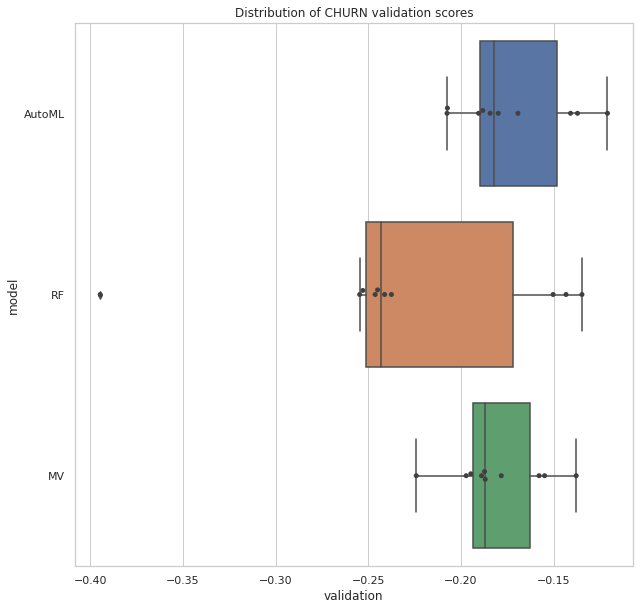

In [116]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
# plot boxplot
bp = sns.boxplot(x=f"{scorer}", y="model", data=churn_experiment)
bp = sns.swarmplot(x=f"{scorer}", y="model", data=churn_experiment, color=".25")
plt.title("Distribution of CHURN validation scores")
bp.get_figure().savefig("output/churn_results/base_boxplot.pdf", bbox_inches='tight')

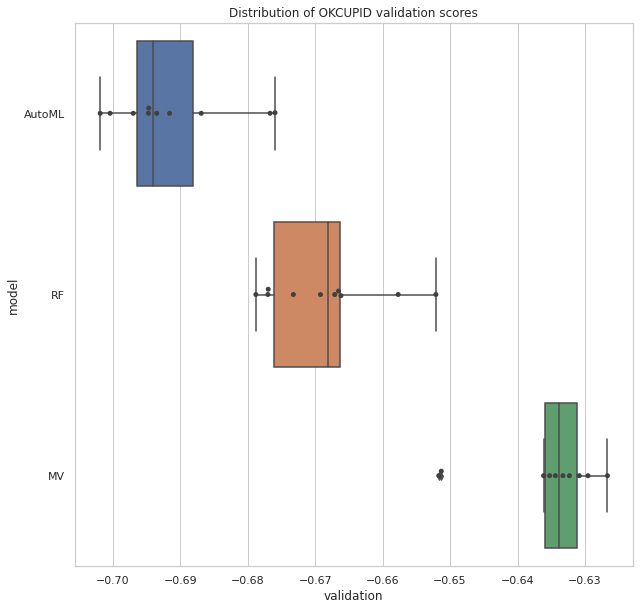

In [132]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
# plot boxplot
bp = sns.boxplot(x=f"{scorer}", y="model", data=cupid_experiment)
bp = sns.swarmplot(x=f"{scorer}", y="model", data=cupid_experiment, color=".25")
plt.title("Distribution of OKCUPID validation scores")
bp.get_figure().savefig("output/okcupid_results/base_boxplot.pdf", bbox_inches='tight')

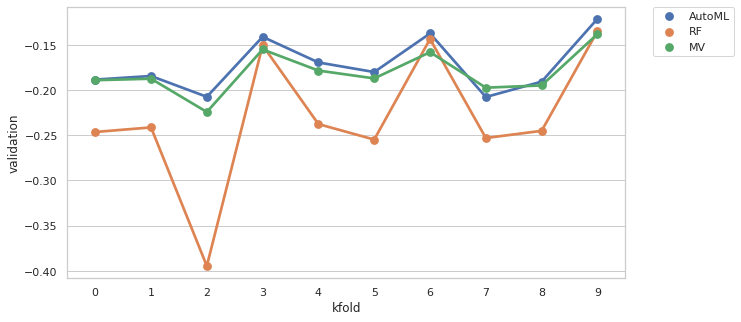

In [33]:
plt.figure(figsize=(10,5))
scorer="neg_log_loss"
g = sns.pointplot(data=churn_experiment, x="kfold", y=f"{scorer}", hue="model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g.get_figure().savefig("output/churn_kfold.pdf", bbox_inches='tight')

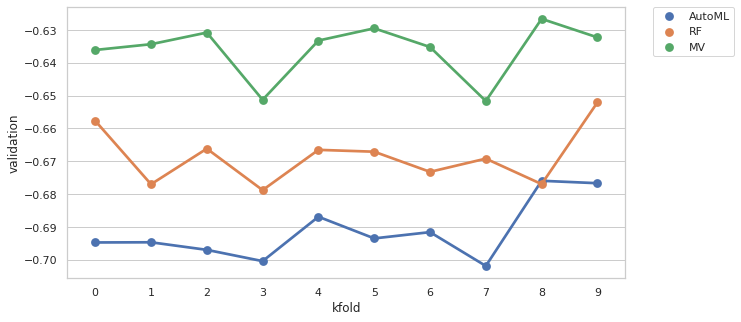

In [34]:
plt.figure(figsize=(10,5))
scorer="neg_log_loss"
g = sns.pointplot(data=cupid_experiment, x="kfold", y=f"{scorer}", hue="model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.get_figure().savefig("output/cupid_kfold.pdf", bbox_inches='tight')

## Which model is selected?

In [35]:
churn_champions = churn_automl[churn_automl["overall_champion"] == "overall_champion"]
cupid_champions = cupid_automl[cupid_automl["overall_champion"] == "overall_champion"]

In [50]:
churn_selected_models = pd.DataFrame(churn_champions[["combination",
                              "kfold"]].drop_duplicates()["combination"].value_counts()).reset_index()

churn_selected_models.rename(columns={"index": "selected_combination",
                                      "combination": "frequency"}, inplace=True)

cupid_selected_models = pd.DataFrame(cupid_champions[["combination", 
                              "kfold"]].drop_duplicates()["combination"].value_counts()).reset_index()

cupid_selected_models.rename(columns={"index": "selected_combination",
                                      "combination": "frequency"}, inplace=True)

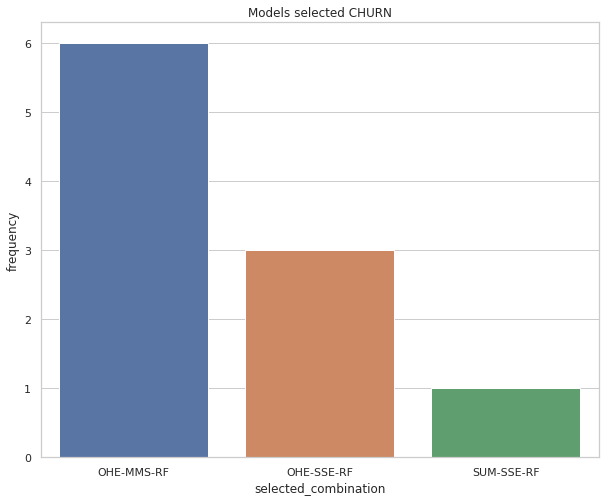

In [113]:
plt.figure(figsize=(10,8))
g = sns.barplot(data=churn_selected_models, x="selected_combination", y="frequency")
plt.title("Models selected CHURN")
g.get_figure().savefig("output/churn_selected_models.pdf", bbox_inches='tight')

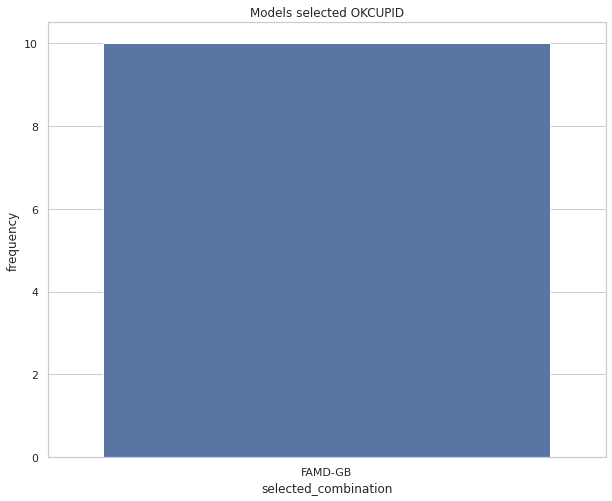

In [114]:
plt.figure(figsize=(10,8))
g = sns.barplot(data=cupid_selected_models, x="selected_combination", y="frequency")
plt.title("Models selected OKCUPID")
g.get_figure().savefig("output/cupid_selected_models.pdf", bbox_inches='tight')

# Internal optimization

### Successive Halving iteration

<Figure size 720x720 with 0 Axes>

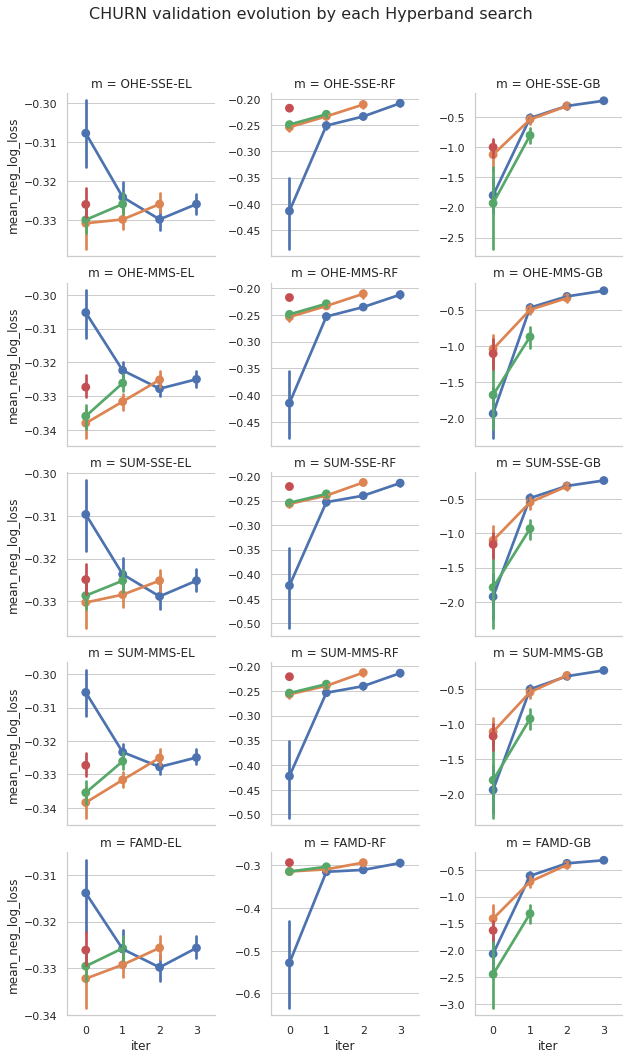

In [129]:
plt.figure(figsize=(10,10))
churn_automl.rename(columns={"mean_test_score": "mean_neg_log_loss", 
                             "combination": "m"}, inplace=True)
g = sns.FacetGrid(churn_automl, col="m", col_wrap=5, hue="hyperband_iter", sharey=False)
g.map(sns.pointplot, "iter", "mean_neg_log_loss", order=[0,1,2,3], hue_order=[0,1,2,3])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('CHURN validation evolution by each Hyperband search', fontsize=16)
g.savefig("output/churn_hyperband_by_model.pdf", bbox_inches="tight")

<Figure size 720x720 with 0 Axes>

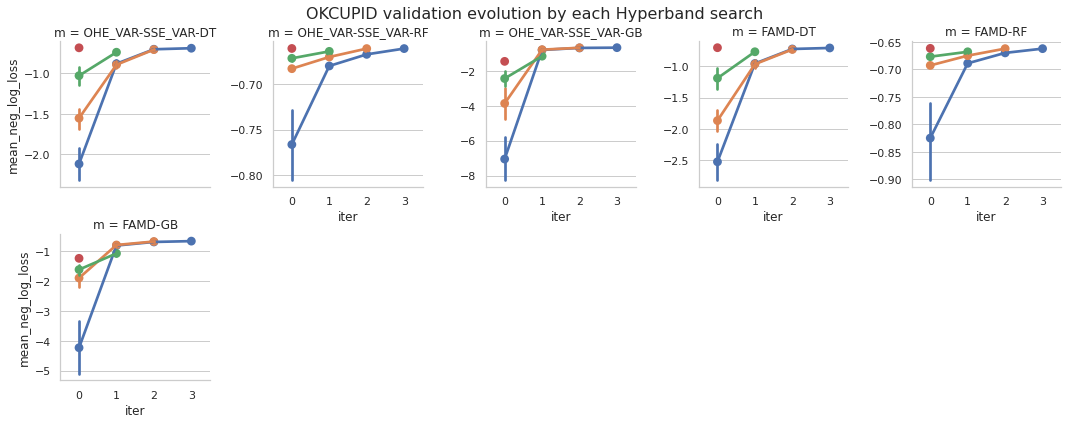

In [143]:
plt.figure(figsize=(10,10))
cupid_automl.rename(columns={"mean_test_score": "mean_neg_log_loss", 
                             "combination": "m"}, inplace=True)
g = sns.FacetGrid(cupid_automl, col="m", col_wrap=5, hue="hyperband_iter", sharey=False)
g.map(sns.pointplot, "iter", "mean_neg_log_loss", order=[0,1,2,3], hue_order=[0,1,2,3])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('OKCUPID validation evolution by each Hyperband search', fontsize=16)
g.savefig("output/cupid_hyperband_by_model.pdf", bbox_inches="tight")

# Evolution of best test score

In [182]:
churn_avg = pd.DataFrame(churn_automl.groupby(["kfold", "hyperband_iter", "iter"])["mean_neg_log_loss"].max()).reset_index()
churn_avg = pd.DataFrame(churn_avg.groupby(["hyperband_iter", "iter"])["mean_neg_log_loss"].mean()).reset_index()


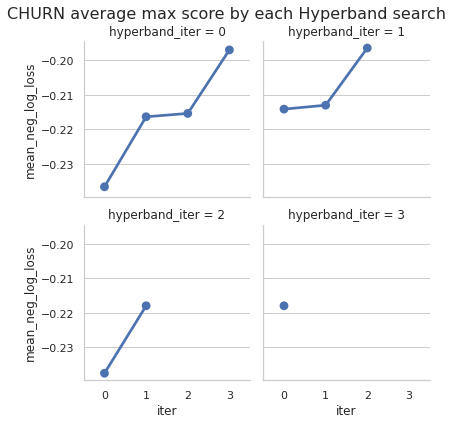

In [188]:
g = sns.FacetGrid(churn_avg, col="hyperband_iter", col_wrap=2, sharey=True)
g.map(sns.pointplot, "iter", "mean_neg_log_loss", order=[0,1,2,3])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('CHURN average max score by each Hyperband search', fontsize=16)
g.savefig("output/churn_hyperband_by_iter.pdf", bbox_inches="tight")

In [189]:
cupid_avg = pd.DataFrame(cupid_automl.groupby(["kfold", "hyperband_iter", "iter"])["mean_neg_log_loss"].max()).reset_index()
cupid_avg = pd.DataFrame(cupid_avg.groupby(["hyperband_iter", "iter"])["mean_neg_log_loss"].mean()).reset_index()


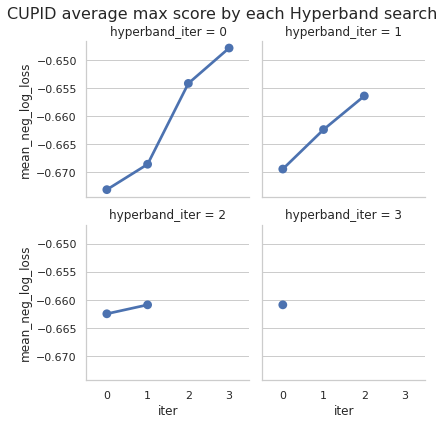

In [191]:
g = sns.FacetGrid(cupid_avg, col="hyperband_iter", col_wrap=2, sharey=True)
g.map(sns.pointplot, "iter", "mean_neg_log_loss", order=[0,1,2,3])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('CUPID average max score by each Hyperband search', fontsize=16)
g.savefig("output/cupid_hyperband_by_iter.pdf", bbox_inches="tight")

In [192]:
churn_havg = pd.DataFrame(churn_automl.groupby(["kfold", "hyperband_iter"])["mean_neg_log_loss"].max()).reset_index()
churn_havg = pd.DataFrame(churn_havg.groupby("hyperband_iter")["mean_neg_log_loss"].mean()).reset_index()

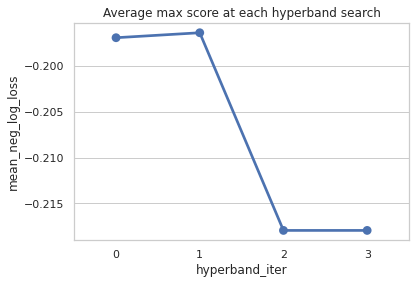

In [199]:
g = sns.pointplot(data=churn_havg, y="mean_neg_log_loss", x="hyperband_iter")
plt.title("Average max score at each hyperband search")
g.get_figure().savefig("output/churn_avg_hyperband.pdf", bbox_inches="tight")

In [196]:
cupid_havg = pd.DataFrame(cupid_automl.groupby(["kfold", "hyperband_iter"])["mean_neg_log_loss"].max()).reset_index()
cupid_havg = pd.DataFrame(cupid_havg.groupby("hyperband_iter")["mean_neg_log_loss"].mean()).reset_index()

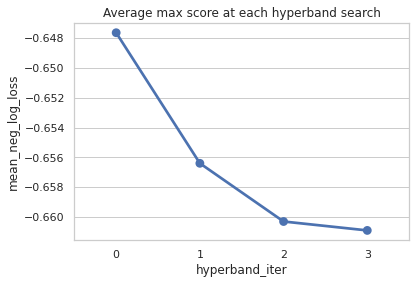

In [200]:
g=sns.pointplot(data=cupid_havg, y="mean_neg_log_loss", x="hyperband_iter")
plt.title("Average max score at each hyperband search")
g.get_figure().savefig("output/cupid_avg_hyperband.pdf", bbox_inches="tight")